# Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
test=pd.DataFrame([{'Col1':1,'Col2':2},{'Col1':5,'Col2':4}])
test['test']=test['Col1']+test['Col2']
test.loc[:,'Col1']=[6,6]
test.loc[:,'Col1']=np.exp(test.loc[:,'Col1'])
test
test.Col1=np.sin(test.Col1)
test
test.stack().mean()

3.32162208229674

In [3]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [4]:
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [5]:
area.index & population.index

Index(['California', 'Texas'], dtype='object')

In [6]:
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
A

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [7]:
df = pd.DataFrame(A, columns=list('QRST'))

df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


In [8]:
df.subtract(df['R'],axis=0)


,Q,R,S,T
0,3,0,4,1
1,-3,0,-7,-3
2,3,0,-1,3


In [9]:
df['Q'][1]=np.nan
print(df)
df.fillna(method='ffill')

     Q  R  S  T
0  6.0  3  7  4
1  NaN  9  2  6
2  7.0  4  3  7


,Q,R,S,T
0,6.0,3,7,4
1,6.0,9,2,6
2,7.0,4,3,7


In [10]:
sp500=pd.read_csv("YAHOO-INDEX_GSPC.csv",parse_dates=[0])
print(sp500.dtypes)
print(sp500.head())
sp500.sort_values(by='Date',inplace=True)
sp500.index = range(1,len(sp500) + 1)
print(sp500.head())
close=sp500['Adjusted Close']

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
Adjusted Close           float64
dtype: object
        Date      Open      High       Low     Close    Volume  Adjusted Close
0 2016-12-29 -0.009131 -0.007397 -0.002023 -0.000293 -0.023404       -0.000293
1 2016-12-28  0.001765 -0.001104 -0.007519 -0.008357  0.203958       -0.008357
2 2016-12-27  0.002646  0.004431  0.003236  0.002248 -0.016565        0.002248
3 2016-12-23 -0.001184  0.000270  0.001223  0.001252 -0.297523        0.001252
4 2016-12-22 -0.003352 -0.003544 -0.004004 -0.001863  0.008446       -0.001863
        Date      Open      High       Low     Close    Volume  Adjusted Close
1 1950-01-04  0.011405  0.011405  0.011405  0.011405  0.500000        0.011405
2 1950-01-05  0.004748  0.004748  0.004748  0.004748  0.349206        0.004748
3 1950-01-06  0.002953  0.002953  0.002953  

In [11]:
import seaborn as sns

In [12]:
sp500.size

117999

In [13]:
sns.set()
%matplotlib inline

In [14]:
close.describe()
close.median()
close.mean()

0.0003379843363357518

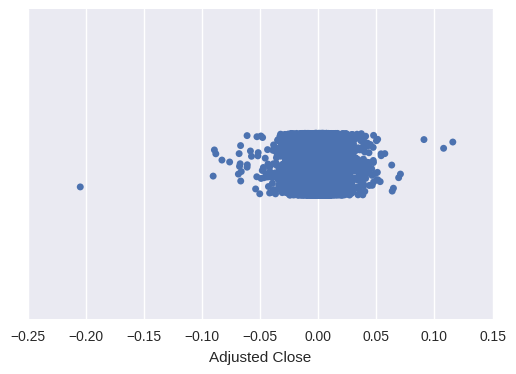

In [15]:
sns.stripplot(close,jitter=True)

In [16]:
mean=close.mean()
std=close.std()

import matplotlib.pyplot as plt

Ok
Ok


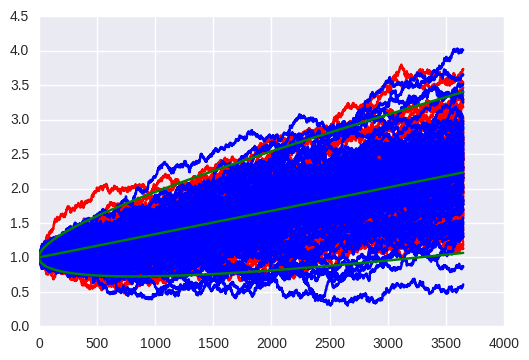

In [17]:
period=range(365*10)
trials=100
def random_walker():
    
    upto=np.zeros((len(period),trials))
    bars=np.zeros((len(period),3))
    # Prepare bars
    bars[0,:]=1
    for i in period[1:]:    
        bars[i,0]=std*np.sqrt(i)*2+1+i*mean
        bars[i,1]=-std*np.sqrt(i)*2+1+i*mean
        bars[i,2]=mean+bars[i-1,2]
    # From gaussian
    ones=np.ones((1,trials))
    values=np.vstack((ones,np.random.normal(loc=mean,scale=std,size=(len(period)-1,trials))))
    upto=np.cumsum(values,axis=0)

    plt.plot(upto,color='red')
    print('Ok')

    # # From real
    
    values=np.vstack((ones,close.sample(replace=True,n=(len(period)-1)*trials).values.reshape(len(period)-1,trials)))
    upto=np.cumsum(values,axis=0)
    print('Ok')

    _=plt.plot(upto,color='blue')
    _=plt.plot(bars,color='green')
    

random_walker()



In [18]:
# Is sampling with pandas slower than with numpy?
%timeit close.sample(replace=True,n=(len(period)-1)*trials).values.reshape(len(period)-1,trials)
%timeit np.random.normal(loc=mean,scale=std,size=(len(period)-1,trials))
%timeit np.random.normal(loc=mean,scale=std,size=((len(period)-1)*trials))

10 loops, best of 3: 29 ms per loop
10 loops, best of 3: 44.8 ms per loop
10 loops, best of 3: 35.3 ms per loop


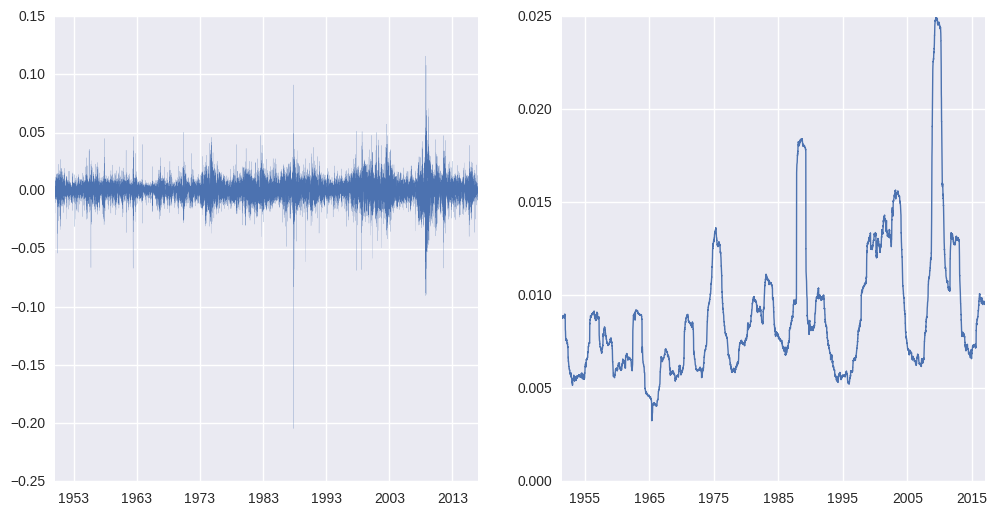

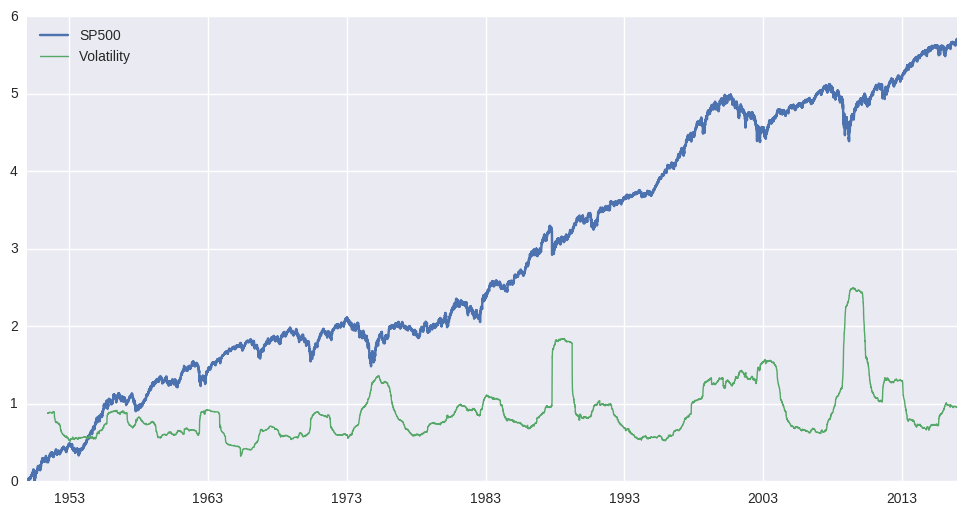

In [19]:

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
plt.plot(sp500['Date'],sp500['Close'], linewidth=0.1)
ax2 = fig.add_subplot(122)
plt.plot(sp500['Date'],sp500['Close'].rolling(window=365).std(), linewidth=1)
sp500['Sum']=close.cumsum()

fig2 = plt.figure(figsize=(12,6))
plt.plot(sp500['Date'],sp500['Sum'])
plt.plot(sp500['Date'],sp500['Close'].rolling(window=365).std()*100, linewidth=1)
plt.legend(['SP500','Volatility'],loc='best')


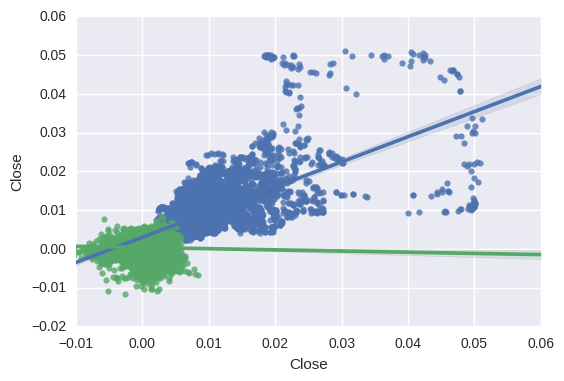

In [20]:
sns.regplot(sp500['Close'].rolling(window=30).std(),sp500['Close'].rolling(window=30).std().shift(30))
sns.regplot(sp500['Close'].rolling(window=30).mean(),sp500['Close'].rolling(window=30).mean().shift(30))

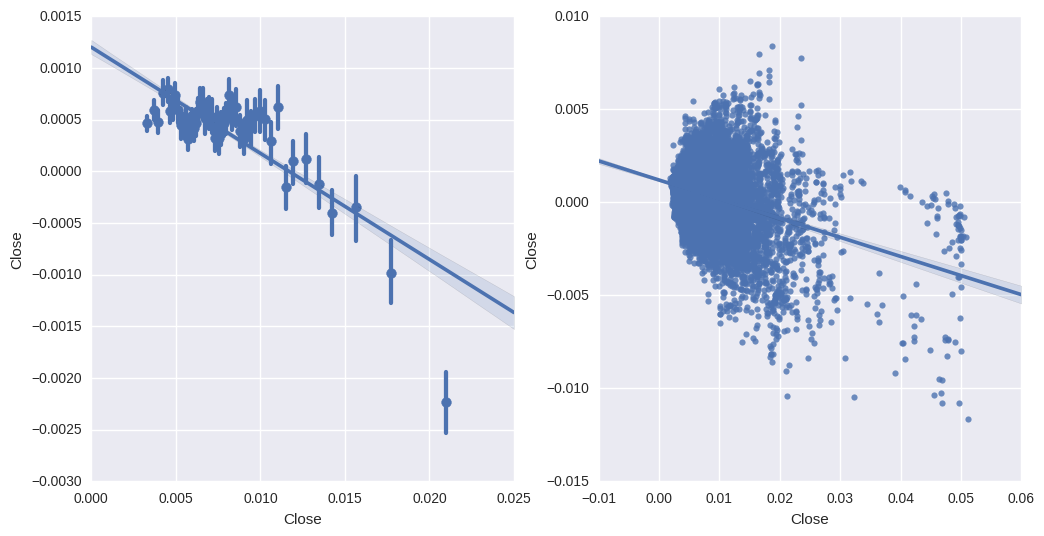

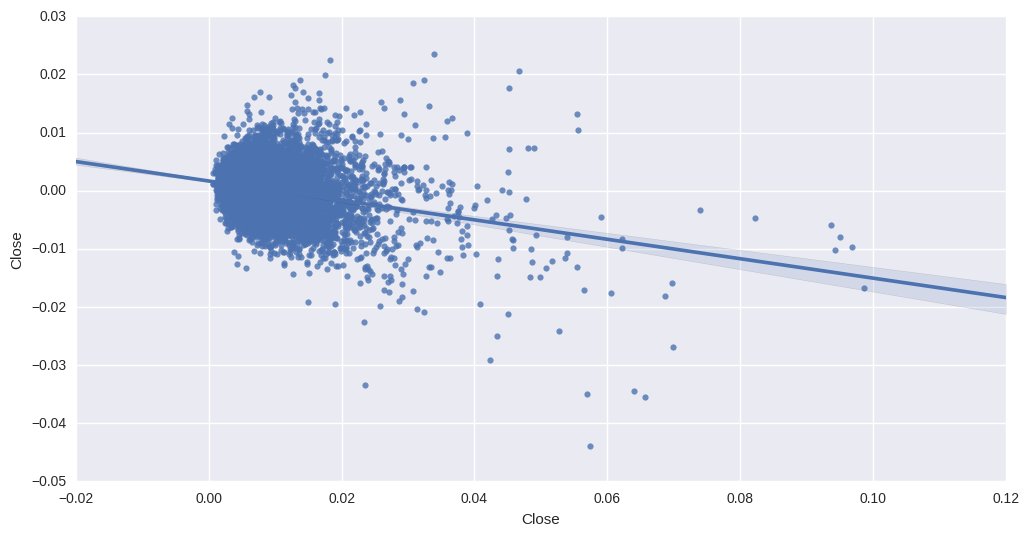

In [21]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)

sns.regplot(sp500['Close'].rolling(window=30).std(),sp500['Close'].rolling(window=30).mean().shift(30),x_bins=50)
ax1=fig.add_subplot(122)
sns.regplot(sp500['Close'].rolling(window=30).std(),sp500['Close'].rolling(window=30).mean().shift(30))
fig=plt.figure(figsize=(12,6))
sns.regplot(sp500['Close'].rolling(window=7).std(),sp500['Close'].rolling(window=7).mean().shift(7))

# Var calculation